<a href="https://colab.research.google.com/github/prathikshamallya/prathikshamallya/blob/main/cat_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:03<00:00, 253MB/s]
100% 1.06G/1.06G [00:03<00:00, 288MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten, BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create cnn model

model=Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 93s 124ms/step - loss: 1.4833 - accuracy: 0.5846 - val_loss: 0.6940 - val_accuracy: 0.6368
Epoch 2/10
625/625 [==============================] - 81s 127ms/step - loss: 0.6248 - accuracy: 0.6686 - val_loss: 0.5925 - val_accuracy: 0.6964
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5138 - accuracy: 0.7479 - val_loss: 0.4856 - val_accuracy: 0.7654
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4689 - accuracy: 0.7846 - val_loss: 0.5801 - val_accuracy: 0.6634
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3954 - accuracy: 0.8242 - val_loss: 0.4137 - val_accuracy: 0.8064
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3226 - accuracy: 0.8613 - val_loss: 0.4491 - val_accuracy: 0.7946
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2429 - accuracy: 0.8996 - val_loss: 0.5894 - val_ac

In [ ]:
!pip install matplotlib-venn

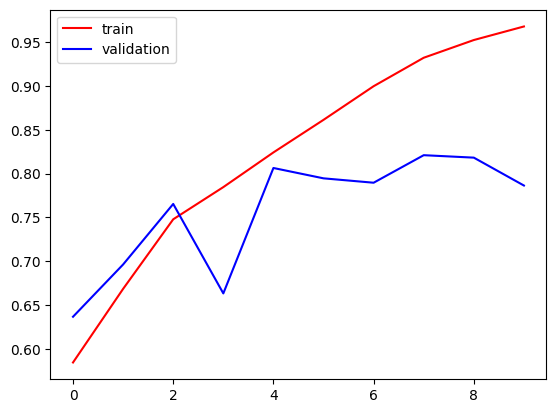

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

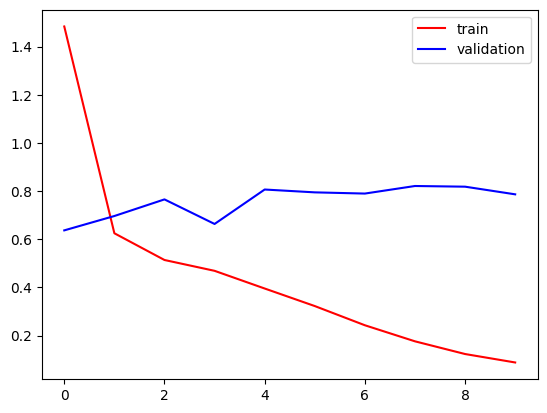

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.webp')

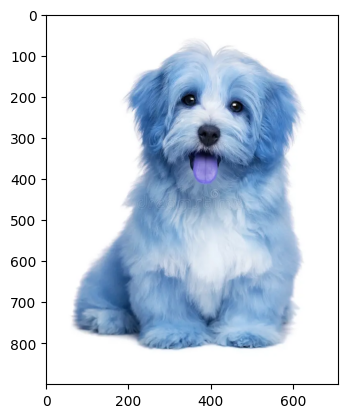

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(900, 711, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.]], dtype=float32)